In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arima import arima
import urllib.request

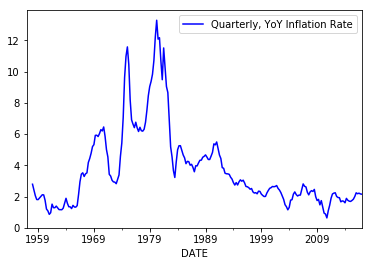

In [6]:
# Download CPI data from FRED
url = 'https://fred.stlouisfed.org/series/CPILFESL/downloaddata/CPILFESL.csv'
source = urllib.request.urlopen(url).read().decode('utf-8').split("\n")
df_monthly = pd.read_csv(url, header=0, parse_dates=[0], index_col=0, squeeze=True)

# Monthly to Quarterly
resample = df_monthly.resample('Q')
df_quarterly = resample.mean()

# Year over Year growth
df_yoy = df_quarterly.pct_change(periods=4)*100

# Convert to numpy
pi=df_yoy.values
pi = pi[4:,]

# Plot data
plt.figure()
df_yoy.plot(style='b', label='Quarterly, YoY Inflation Rate')
plt.legend()
plt.show()

In [8]:
# IMA(1,1)

p = 0
d = 1
q = 1

# Model Instance
ima = arima(p, d, q, pi)

# Estimate the IMA model using maximum likelihood
phi, theta = ima.mle()